<span style='color:#008000; font-size:20pt; font-weight:bold'>Import Libraries</span>

In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', None) # This code will display all of the dataframe
# pd.reset_option('all') # Reset to default

<span style='color:#008000; font-size:20pt; font-weight:bold'>Loading Dataset</span>

In [3]:
movielens_movies = pd.read_csv('movielens-1m/movies.dat', sep='::', engine='python', 
                        names=['movieId', 'title', 'genres'], encoding='ISO-8859-1')

In [4]:
movie_metadata = pd.read_csv('movies_metadata.csv', low_memory=False)

<span style='color:#008000; font-size:20pt; font-weight:bold'>Data Cleaning</span>

<span style='color:#007ACC; font-size:15pt; font-weight:bold'>MovieLens-1M</span>

In [ ]:
movielens_movies.tail()

,movieId,title,genres
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama
3882,3952,"Contender, The (2000)",Drama|Thriller


In [5]:

movielens_movies['year'] = movielens_movies['title'].str.extract(r'\((\d{4})\)')

movielens_movies['title'] = movielens_movies['title'].str.replace(r'\(\d{4}\)', '', regex=True).str.strip()


movielens_movies['title'] = movielens_movies['title'].str.replace(r'\s+', ' ', regex=True).str.strip()


def fix_title_regex(title):
    return re.sub(r"^(.*), (The|A|An|L'|Le)( \(.+\))?$", r'\2 \1\3', title)
movielens_movies['title'] = movielens_movies['title'].apply(fix_title_regex)

In [ ]:
movielens_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  3883 non-null   int64 
 1   title    3883 non-null   object
 2   genres   3883 non-null   object
 3   year     3883 non-null   object
dtypes: int64(1), object(3)
memory usage: 121.5+ KB


<span style='color:#007ACC; font-size:15pt; font-weight:bold'>Movie-Metadata</span>

In [25]:
movie_metadata['release_date'] = movie_metadata['release_date'].astype(str).str[:4]         
movie_metadata['title'] = movie_metadata['title'].str.replace(r'\s+', ' ', regex=True).str.strip()

In [26]:
movie_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45466 non-null  object 
 15  re

<span style='color:#007ACC; font-size:15pt; font-weight:bold'>Merging btw MovieLens_Movies and Movie_Metadata</span>

In [ ]:
merged = pd.merge(movielens_movies, movie_metadata[['title', 'release_date', 'overview']], 
                    left_on=['title', 'year'], right_on=['title', 'release_date'], how='left')

In [ ]:
merged.head(5)

,movieId,title,genres,year,release_date,overview
0,1,Toy Story,Animation|Children's|Comedy,1995,1995,"Led by Woody, Andy's toys live happily in his ..."
1,2,Jumanji,Adventure|Children's|Fantasy,1995,1995,When siblings Judy and Peter discover an encha...
2,3,Grumpier Old Men,Comedy|Romance,1995,1995,A family wedding reignites the ancient feud be...
3,4,Waiting to Exhale,Comedy|Drama,1995,1995,"Cheated on, mistreated and stepped on, the wom..."
4,5,Father of the Bride Part II,Comedy,1995,1995,Just when George Banks has recovered from his ...


In [ ]:
merged.isna().sum()

movieId           0
title             0
genres            0
year              0
release_date    853
overview        861
dtype: int64

In [ ]:
merged = merged.drop_duplicates(subset=['movieId', 'title', 'year'])


In [ ]:
merged = merged.rename(columns={'overview':'description'})

In [ ]:
merged = merged[['movieId', 'title', 'genres', 'year', 'description']]
merged

,movieId,title,genres,year,description
0,1,Toy Story,Animation|Children's|Comedy,1995,"Led by Woody, Andy's toys live happily in his ..."
1,2,Jumanji,Adventure|Children's|Fantasy,1995,When siblings Judy and Peter discover an encha...
2,3,Grumpier Old Men,Comedy|Romance,1995,A family wedding reignites the ancient feud be...
3,4,Waiting to Exhale,Comedy|Drama,1995,"Cheated on, mistreated and stepped on, the wom..."
4,5,Father of the Bride Part II,Comedy,1995,Just when George Banks has recovered from his ...
5,6,Heat,Action|Crime|Thriller,1995,"Obsessive master thief, Neil McCauley leads a ..."
6,7,Sabrina,Comedy|Romance,1995,An ugly duckling having undergone a remarkable...
7,8,Tom and Huck,Adventure|Children's,1995,"A mischievous young boy, Tom Sawyer, witnesses..."
8,9,Sudden Death,Action,1995,International action superstar Jean Claude Van...
9,10,GoldenEye,Action|Adventure|Thriller,1995,James Bond must unmask the mysterious head of ...


In [ ]:
merged.isna().sum()

movieId          0
title            0
genres           0
year             0
description    861
dtype: int64

In [ ]:
unmatched_titles = movielens_movies[~movielens_movies['title'].isin(movie_metadata['title'])]
unmatched_titles

In [ ]:
merged[pd.isna(merged['description'])]

In [ ]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3883 entries, 0 to 3888
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   movieId      3883 non-null   int64 
 1   title        3883 non-null   object
 2   genres       3883 non-null   object
 3   year         3883 non-null   object
 4   description  3022 non-null   object
dtypes: int64(1), object(4)
memory usage: 182.0+ KB


In [ ]:
missing_descriptions = merged[pd.isna(merged['description'])]
print(f"Number of missing description movies: {len(missing_descriptions)}")

Number of missing description movies: 861


<span style='color:#007ACC; font-size:15pt; font-weight:bold'>Call OMDB API to fill in missing description movies</span>

In [132]:
import requests
import time

API_KEY = "271a55f8"

def fetch_movie_description(title):
    url = f"http://www.omdbapi.com/?t={title}&apikey={API_KEY}"
    response = requests.get(url)
    data = response.json()
    
    if "Plot" in data and data["Plot"] != "N/A":
        return data["Plot"]
    
    return "No description available"


In [ ]:
merged['description'] = merged.apply(
    lambda row: fetch_movie_description(row['title']) if pd.isna(row['description']) else row['description'],
    axis=1
)

In [ ]:
print(f"Number of missing description movies: {merged['description'].isna().sum()}")

Number of missing description movies: 0


<span style='color:#007ACC; font-size:15pt; font-weight:bold'>Extract to CSV file</span>

In [ ]:
merged.to_csv('movielens_movies_with_descriptions.csv', index=False, encoding='utf-8')

In [14]:
movies_path = "movielens-1m/movies.dat"
ratings_path = "movielens-1m/ratings.dat"
users_path = "movielens-1m/users.dat"

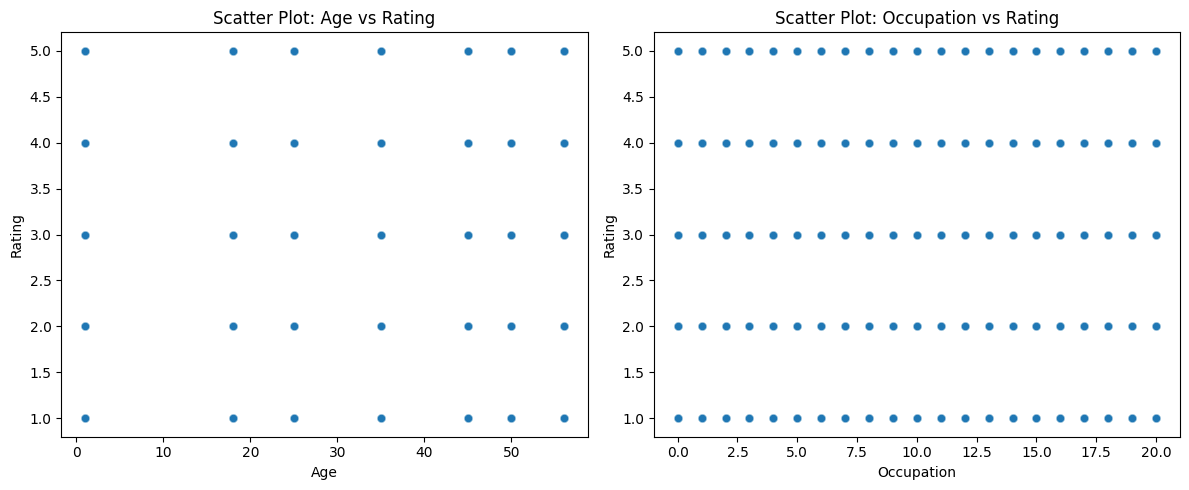

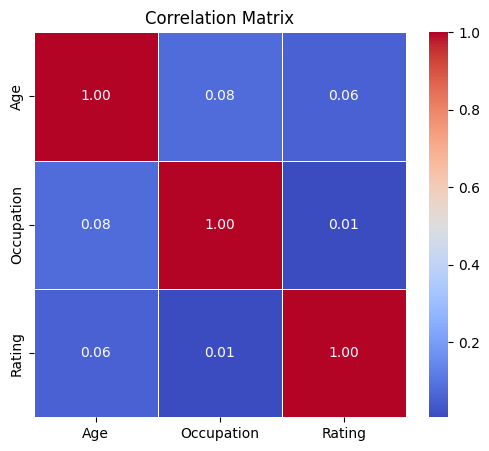

In [15]:
# Reload datasets correctly
movies = pd.read_csv(movies_path, sep="::", engine="python", header=None, names=["MovieID", "Title", "Genres"], encoding="ISO-8859-1")
ratings = pd.read_csv(ratings_path, sep="::", engine="python", header=None, names=["UserID", "MovieID", "Rating", "Timestamp"], encoding="ISO-8859-1")
users = pd.read_csv(users_path, sep="::", engine="python", header=None, names=["UserID", "Gender", "Age", "Occupation", "Zip-code"], encoding="ISO-8859-1")

# Merge datasets
merged_data = ratings.merge(users, on="UserID").merge(movies, on="MovieID")

# Generate scatter plots and correlation matrices again
numerical_cols = ["Age", "Occupation", "Rating"]
corr_matrix = merged_data[numerical_cols].corr()

# Scatter plots
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=merged_data["Age"], y=merged_data["Rating"], alpha=0.2)
plt.xlabel("Age")
plt.ylabel("Rating")
plt.title("Scatter Plot: Age vs Rating")

plt.subplot(1, 2, 2)
sns.scatterplot(x=merged_data["Occupation"], y=merged_data["Rating"], alpha=0.2)
plt.xlabel("Occupation")
plt.ylabel("Rating")
plt.title("Scatter Plot: Occupation vs Rating")

plt.tight_layout()
plt.show()

# Correlation matrix heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [17]:
# Load the new dataset
new_movies_path = "movielens_movies_with_descriptions.csv"
new_movies = pd.read_csv(new_movies_path)

# Display basic information and first few rows
new_movies.info(), new_movies.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   movieId      3883 non-null   int64 
 1   title        3883 non-null   object
 2   genres       3883 non-null   object
 3   year         3883 non-null   int64 
 4   description  3883 non-null   object
dtypes: int64(2), object(3)
memory usage: 151.8+ KB


(None,
    movieId                        title                        genres  year  \
 0        1                    Toy Story   Animation|Children's|Comedy  1995   
 1        2                      Jumanji  Adventure|Children's|Fantasy  1995   
 2        3             Grumpier Old Men                Comedy|Romance  1995   
 3        4            Waiting to Exhale                  Comedy|Drama  1995   
 4        5  Father of the Bride Part II                        Comedy  1995   
 
                                          description  
 0  Led by Woody, Andy's toys live happily in his ...  
 1  When siblings Judy and Peter discover an encha...  
 2  A family wedding reignites the ancient feud be...  
 3  Cheated on, mistreated and stepped on, the wom...  
 4  Just when George Banks has recovered from his ...  )

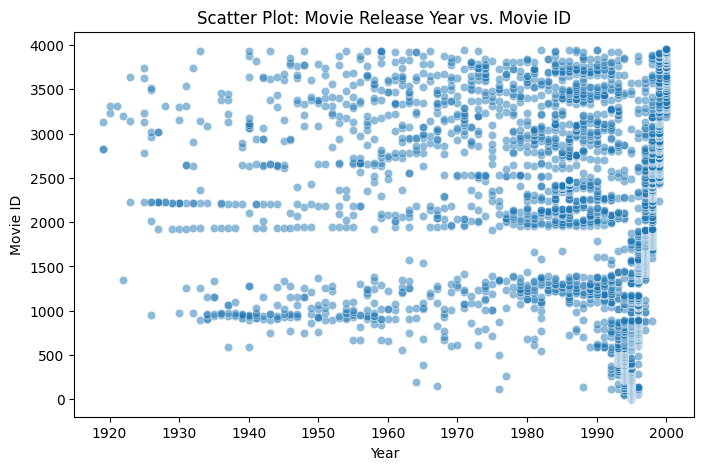

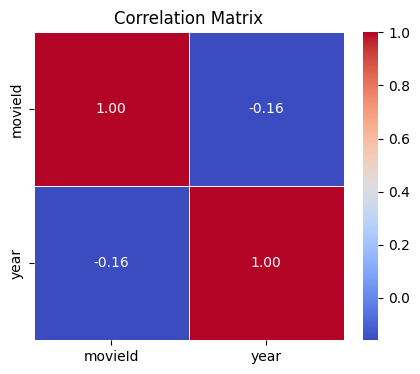

In [18]:
# Compute correlation matrix for numerical columns
numerical_cols = ["movieId", "year"]
corr_matrix = new_movies[numerical_cols].corr()

# Scatter plot: Movie ID vs. Year
plt.figure(figsize=(8, 5))
sns.scatterplot(x=new_movies["year"], y=new_movies["movieId"], alpha=0.5)
plt.xlabel("Year")
plt.ylabel("Movie ID")
plt.title("Scatter Plot: Movie Release Year vs. Movie ID")
plt.show()

# Correlation matrix heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [23]:
# Correctly define the file path and reload the dataset
movies_data = pd.read_csv("movielens_movies_with_descriptions.csv")

# Display the first few rows to verify loading
movies_data.head()

,movieId,title,genres,year,description
0,1,Toy Story,Animation|Children's|Comedy,1995,"Led by Woody, Andy's toys live happily in his ..."
1,2,Jumanji,Adventure|Children's|Fantasy,1995,When siblings Judy and Peter discover an encha...
2,3,Grumpier Old Men,Comedy|Romance,1995,A family wedding reignites the ancient feud be...
3,4,Waiting to Exhale,Comedy|Drama,1995,"Cheated on, mistreated and stepped on, the wom..."
4,5,Father of the Bride Part II,Comedy,1995,Just when George Banks has recovered from his ...


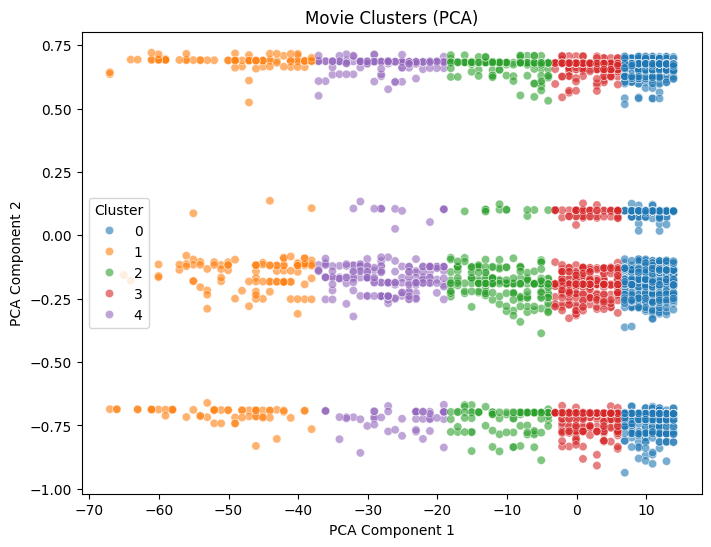

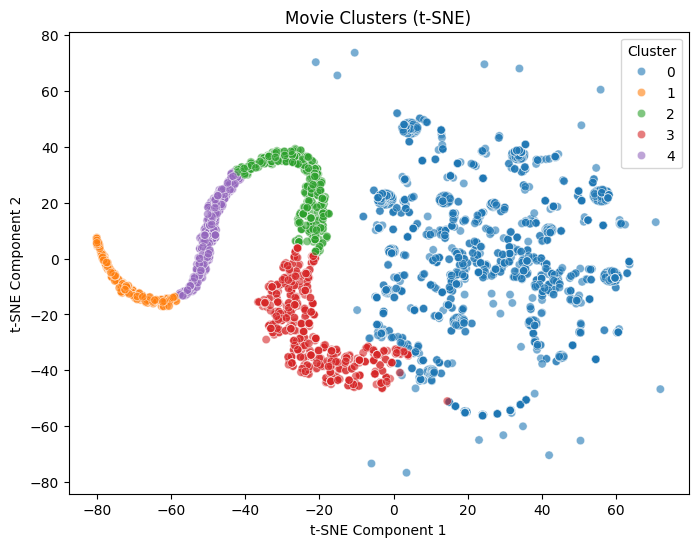

In [24]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

# Convert genre string to list of genres
movies_data["genres"] = movies_data["genres"].apply(lambda x: x.split("|"))

# One-hot encode genres using MultiLabelBinarizer
mlb = MultiLabelBinarizer()
genre_matrix = mlb.fit_transform(movies_data["genres"])
genre_df = pd.DataFrame(genre_matrix, columns=mlb.classes_)

# Add year as a feature for clustering
features = pd.concat([genre_df, movies_data["year"]], axis=1)

# Apply PCA to reduce dimensions to 2D
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(features)

# Scatter plot for PCA visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=clusters, palette="tab10", alpha=0.6)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Movie Clusters (PCA)")
plt.legend(title="Cluster")
plt.show()

# Apply t-SNE for better separation
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_result = tsne.fit_transform(features)

# Scatter plot for t-SNE visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], hue=clusters, palette="tab10", alpha=0.6)
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("Movie Clusters (t-SNE)")
plt.legend(title="Cluster")
plt.show()


In [25]:
# Define file paths
movies_path = "movielens-1m/movies.dat"
users_path = "movielens-1m/users.dat"

# Load movies dataset
movies = pd.read_csv(movies_path, sep="::", engine="python", header=None, names=["MovieID", "Title", "Genres"], encoding="ISO-8859-1")

# Load users dataset
users = pd.read_csv(users_path, sep="::", engine="python", header=None, names=["UserID", "Gender", "Age", "Occupation", "Zip-code"], encoding="ISO-8859-1")

# Display the first few rows of each dataset
movies.head(), users.head()


(   MovieID                               Title                        Genres
 0        1                    Toy Story (1995)   Animation|Children's|Comedy
 1        2                      Jumanji (1995)  Adventure|Children's|Fantasy
 2        3             Grumpier Old Men (1995)                Comedy|Romance
 3        4            Waiting to Exhale (1995)                  Comedy|Drama
 4        5  Father of the Bride Part II (1995)                        Comedy,
    UserID Gender  Age  Occupation Zip-code
 0       1      F    1          10    48067
 1       2      M   56          16    70072
 2       3      M   25          15    55117
 3       4      M   45           7    02460
 4       5      M   25          20    55455)

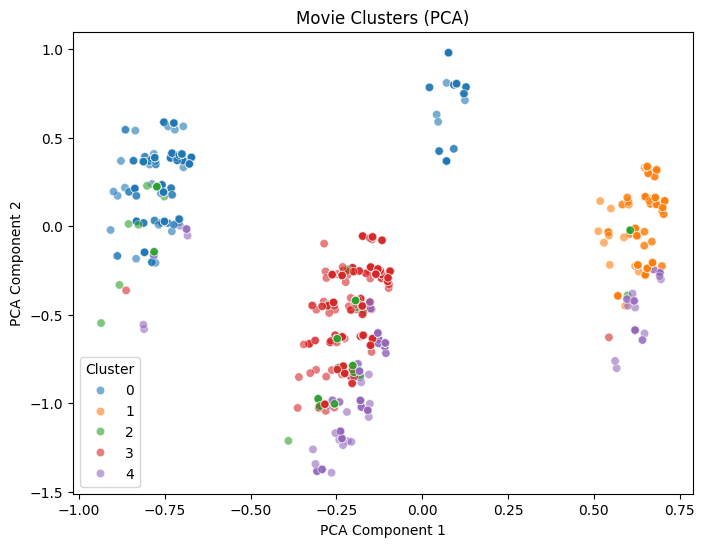

In [26]:
# Convert genres to a list format for one-hot encoding
movies["Genres"] = movies["Genres"].astype(str).apply(lambda x: x.split("|"))

# One-hot encode genres using MultiLabelBinarizer
mlb = MultiLabelBinarizer()
genre_matrix = mlb.fit_transform(movies["Genres"])
genre_df = pd.DataFrame(genre_matrix, columns=mlb.classes_)

# Apply PCA to reduce dimensions to 2D
pca = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(genre_df)

# Apply K-Means clustering to find groups of similar movies
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
clusters = kmeans.fit_predict(genre_df)

# Scatter plot for PCA visualization of movie clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=clusters, palette="tab10", alpha=0.6)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Movie Clusters (PCA)")
plt.legend(title="Cluster")
plt.show()


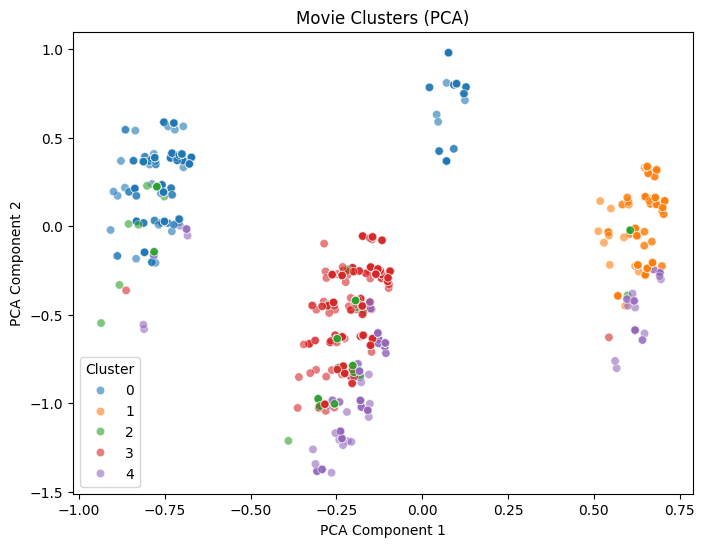

In [27]:
# Re-import necessary library
from sklearn.cluster import KMeans

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
clusters = kmeans.fit_predict(genre_df)

# Scatter plot for PCA visualization of movie clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=clusters, palette="tab10", alpha=0.6)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Movie Clusters (PCA)")
plt.legend(title="Cluster")
plt.show()
